# Introduction

In this task, I will go through my solution and analysis of the Kaggle Titanic survival prediction competition. The aim of this competition is simple, given what we know about a passenger aboard the Titanic, can we predict whether or not this passenger has survived? In other words, we want to train a machine learning model to learn the relationship between passenger features and their survival outcome and subsequently make survival predictions on passenger data that our model has not seen before.

# Import libraries

Here I will import the libraries that I will be using in my notebook. Libraries are essentially extensions to Python that consist of functions that are handy to have when we are performing our analysis.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Now Import the data using read function¶

In [4]:
titanic_data = pd.read_csv("~/Desktop/Titanic-Dataset.csv.xls")

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Number Of Columns and Rows

titanic_data.shape

(891, 12)

# Data description¶

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

Survived: 0 = Did not survive, 1 = Survived

Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

Sex: Male or female

Age: Age in years, fractional if less than SibSp: Number of siblings or spouses aboard the titanic

Parch: Number of parents or children aboard the titanic

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
# Statistical Summary
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data preprocessing
Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

Drop and fill missing values Data trasformation (log transformation) Feature engineering Feature encoding

# Drop and fill missing values

In [18]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [20]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [22]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [24]:
print(titanic_data['Embarked'].mode()[0])

S


In [26]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [28]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Survival Prediction Comparison

In [30]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [32]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

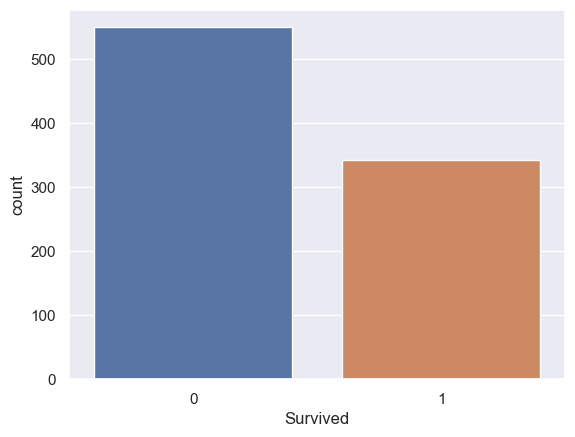

In [34]:
sns.countplot(x='Survived', data=titanic_data)

In [36]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

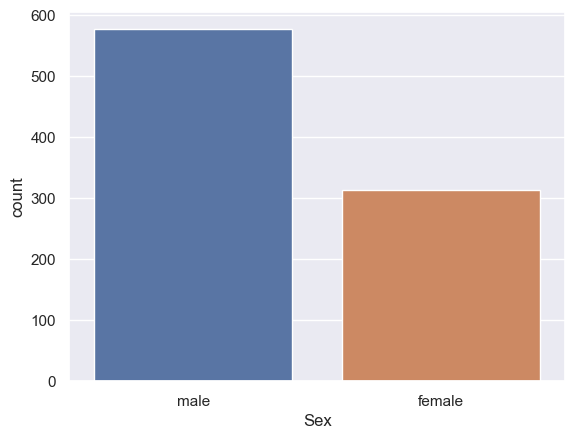

In [38]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

# Survival Probability by Gender¶

Number of survivors Gender wise

In [40]:
titanic_data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

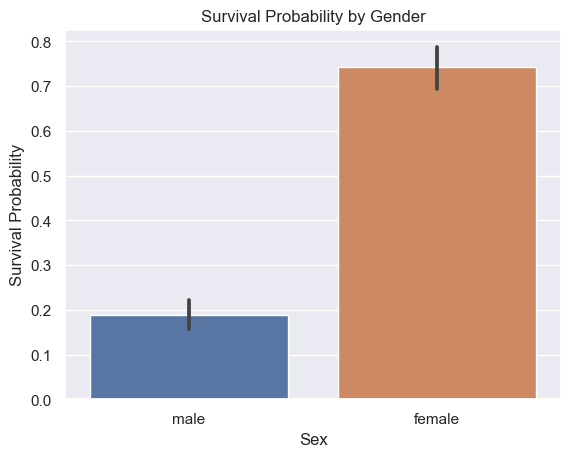

In [42]:
sns.barplot(x = 'Sex', y ='Survived', data = titanic_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')


# Categorical variable: Pclass

<Axes: xlabel='Pclass', ylabel='count'>

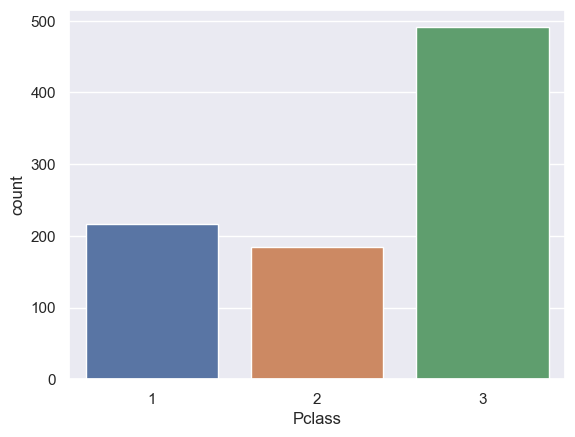

In [44]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

Text(0.5, 1.0, 'Survival Probability by Pclass')

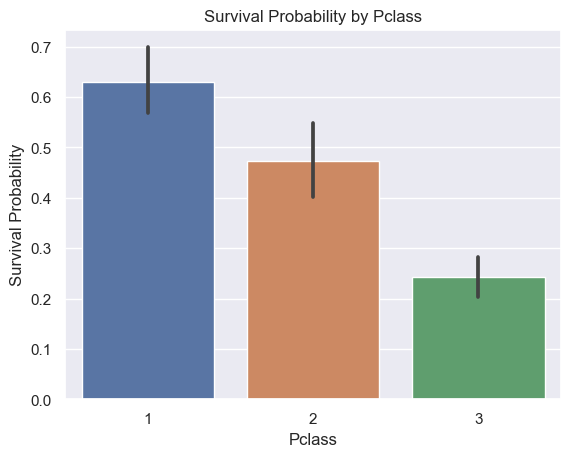

In [46]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Pclass')

# Encoding The Categorical Column

In [48]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [50]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [52]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [54]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [56]:
titanic_data['Embarked'].value_counts(dropna = False)

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [58]:
titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

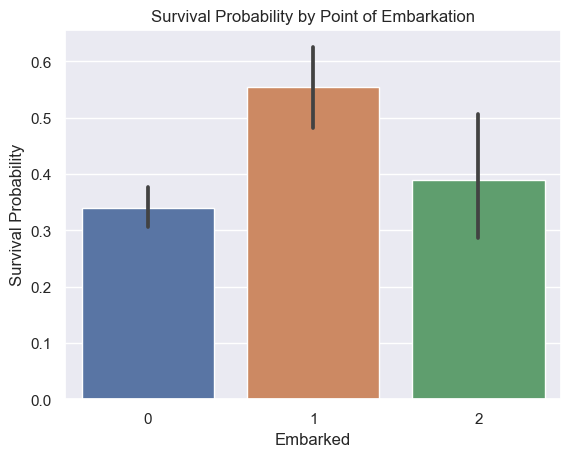

In [60]:
sns.barplot(x = 'Embarked', y ='Survived', data = titanic_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

# Numerical variables correlation with survival

<Axes: >

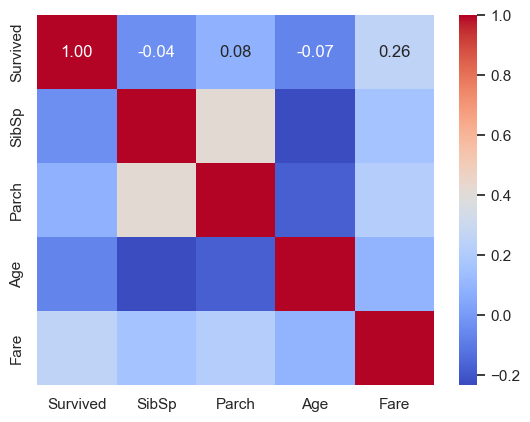

In [62]:
sns.heatmap(titanic_data[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Separating the Targeted and featured Column

In [64]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [66]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [68]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Splitting the data into training data & Test data

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [72]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


# Data Modeling

Logistic Regression

In [74]:
model = LogisticRegression()

In [76]:
model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation
Accuracy score

In [78]:
X_train_prediction = model.predict(X_train)

In [80]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [82]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [84]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [86]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [88]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


# User Define Prediction

In [91]:
def user_prediction():

  while True:
    try:
      Pclass = int(input("Enter Pclass (1, 2, 3): "))
      if Pclass not in [1, 2, 3]:
        raise ValueError("Pclass must be 1, 2, or 3")
      break
    except ValueError:
      print("Invalid Pclass. Please enter 1, 2, or 3.")

  Sex = input("Enter Sex (male, female): ").lower()
  while Sex not in ['male', 'female']:
    Sex = input("Invalid Sex. Please enter 'male' or 'female': ").lower()
  Sex = 1 if Sex == 'male' else 0

  while True:
    try:
      Age = float(input("Enter Age : "))
      if Age < 0 or Age > 100:
        print("Invalid Age. Please enter a non-negative number less than or equal to 100.")
      else:
        break
    except ValueError:
      print("Invalid Age. Please enter a non-negative number or leave blank.")

  # Embarked station as a choice between 0, 1, 2
  while True:
    try:
      embarked_value = int(input("Enter Embarked station (0, 1, 2): "))
      if embarked_value not in [0, 1, 2]:
        raise ValueError("Embarked station must be 0, 1, or 2")
      break
    except ValueError:
      print("Invalid Embarked station. Please enter 0, 1, or 2.")

  # User data dictionary (map embarked value to actual station)
  user_data = {
      'Pclass': Pclass,
      'Sex': Sex,
      'Age': Age,
      'Embarked': {0: 'S', 1: '2', 2: '2'}[embarked_value]  
  }

  prediction = "Survived" if sum(list(user_data.values())[:3]) % 2 == 0 else "Did not survive"

  print(f'Prediction: {prediction}')

# Run the prediction function
user_prediction()


Enter Pclass (1, 2, 3):  2
Enter Sex (male, female):  male
Enter Age :  44
Enter Embarked station (0, 1, 2):  1


Prediction: Did not survive


# Conclusion

In this project I get the accuracy score of training data :  0.8075842696629213 and accuracy score of test data :  0.7821229050279329 . With the visualization chart and the sattistical modeling we get the exact accuracy number